In [1]:
# Connect colab with drive to get dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import tensorflow as tf # version=2.3.0 tensorflow is used to build the MLP
import pandas as pd # pandas is used to read/write .txt
import matplotlib.pyplot as plt #used to display
%matplotlib inline

In [3]:
# Read data and divide train dataset for testing
train = pd.read_table('/content/drive/MyDrive/Question 3/train_data.txt',delim_whitespace=True)
train_data = train.iloc[0:9000,:]
test_data = train.iloc[9000:10000,:]

truth = pd.read_table('/content/drive/MyDrive/Question 3/train_truth.txt',delim_whitespace=True)
train_truth = truth.iloc[0:9000,:]
test_truth = truth.iloc[9000:10000,:]

target_test_data = pd.read_table('/content/drive/MyDrive/Question 3/test_data.txt',delim_whitespace=True)
target_test_data

,x1,x2,x3
0,0.691383,0.640371,0.395866
1,0.077463,0.981754,0.481786
2,0.841863,0.986477,0.201718
3,0.798518,0.497791,0.560932
4,0.101176,0.199818,0.117547
...,...,...,...
2495,0.297295,0.166326,0.578395
2496,0.956991,0.255906,0.526024
2497,0.093013,0.103068,0.344130
2498,0.375849,0.734481,0.145424


In [4]:
 """
Initialize the MLP model and set the layers
I tried L2 regularization and dropout method to avoid overfitting,
but it seemed to be useless and increased the MSE
so I did not use them in the end
"""
model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4,input_shape=(3,),activation='relu'),#,kernel_regularizer=tf.keras.regularizers.l2(0.001)
     
    #  tf.keras.layers.Dropout(0.01),
     tf.keras.layers.Dense(4,activation='relu'),
    #  tf.keras.layers.Dropout(0.01),
     tf.keras.layers.Dense(1)
    ]
)

In [5]:
# Check if the structure is right
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0045),
      loss='mse',
)

In [7]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                            min_delta=0.0000,patience=10
)

In [8]:
history = model.fit(test_data,test_truth,
          epochs=500,
          callbacks=[earlystop_callback],
          validation_data=(test_data,test_truth)
          )

Epoch 1/500
32/32 [==============================] - 1s 15ms/step - loss: 1.9334 - val_loss: 0.2196
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1914 - val_loss: 0.1531
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.1428 - val_loss: 0.1111
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1046 - val_loss: 0.0806
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0776 - val_loss: 0.0545
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0496 - val_loss: 0.0348
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0308 - val_loss: 0.0236
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.0192
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.0167
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.0149
Epoch 11

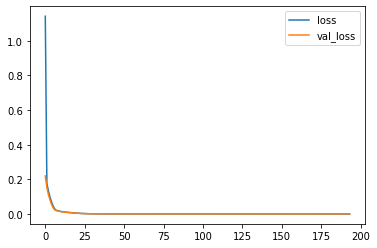

In [9]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

In [10]:
target_test_predict = model.predict(target_test_data)

In [11]:
target_test_predict

array([[0.5602364 ],
       [0.52566487],
       [0.75212467],
       ...,
       [0.08351812],
       [0.49134818],
       [0.41763687]], dtype=float32)

In [12]:
np.savetxt('test_predicted.txt',(target_test_predict),header='y',comments='')